## Load data

In [1]:
from dmml_project.dataset import Dataset
from dmml_project import PROJECT_ROOT
import matplotlib.pyplot as plt
import seaborn as sns

dataset: Dataset = Dataset.load(f'{PROJECT_ROOT}/data/dataset.tsv')

## Data exploration

### Class distribution

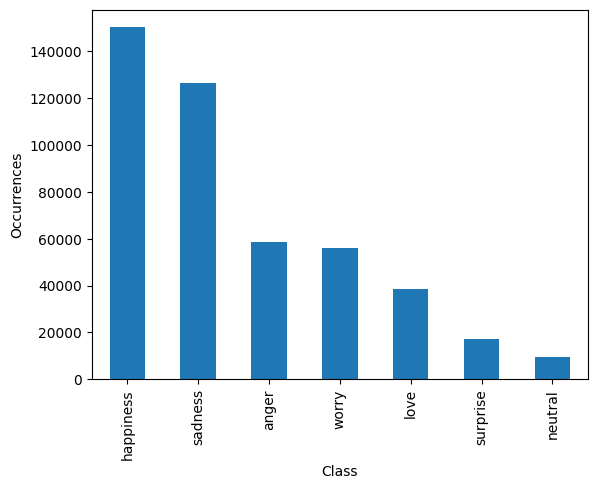

In [2]:
dataset.data['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')
plt.xlabel("Class")
plt.ylabel("Occurrences")
plt.savefig(f'{PROJECT_ROOT}/doc/Documentation/images/class_distribution.png')
plt.show()

### Length distribution
The length was capped at 400 to make the graph more readable, nearly all sequences are shorter than 400.

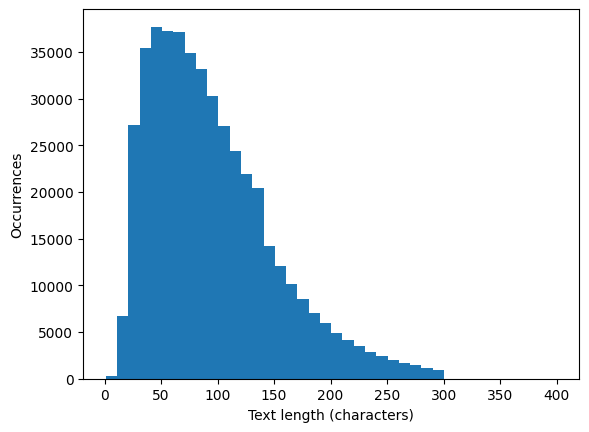

In [3]:
plt.hist([min(len(x), 400) for x in dataset.data['text']], bins=40)
plt.xlabel("Text length (characters)")
plt.ylabel("Occurrences")
plt.savefig(f'{PROJECT_ROOT}/doc/Documentation/images/length_distribution.png')
plt.show()

## Preprocessing

In [4]:
from dmml_project.preprocessor import Preprocessor
from dmml_project import PROJECT_ROOT

pp: Preprocessor = Preprocessor.load(f"{PROJECT_ROOT}/data/preprocessor/tfidf.pkl")

In [5]:
random_examples = dataset.data['text'].sample(5)
print("Before preprocessing:")
print(random_examples)
print("After preprocessing:")
print(pp(random_examples))

Before preprocessing:
385681    i feel even more jealous when you tell me this...
54726     i was in too much post orgasmic bliss even to ...
274261    i had always expected that knowing what i want...
133920    Going to jog down to uni. Quite a way from my ...
440537    i was going through my divorce i was feeling a...
Name: text, dtype: object
After preprocessing:
  (0, 10650)	0.28381433982890564
  (0, 14892)	0.19083807456223426
  (0, 15793)	0.04817284197858871
  (0, 18294)	0.7528865358685999
  (0, 23781)	0.2874489127935186
  (0, 36742)	0.212823962158119
  (0, 41547)	0.3612134001475875
  (0, 46493)	0.23553227894984874
  (1, 5089)	0.5182142094307757
  (1, 14892)	0.25830299912051913
  (1, 15793)	0.06520286681665538
  (1, 21611)	0.40190732273295443
  (1, 30907)	0.26173407637696766
  (1, 33661)	0.5709272591794174
  (1, 36342)	0.32324916375897045
  (2, 1426)	0.2788238879037985
  (2, 3045)	0.5096588776230792
  (2, 12734)	0.3308772110523621
  (2, 14309)	0.3863172943722883
  (2, 15172)	0.369

In [6]:
violin_plot_data = dataset.data.copy()
violin_plot_data['len'] = violin_plot_data['text'].apply(lambda x: len(x))

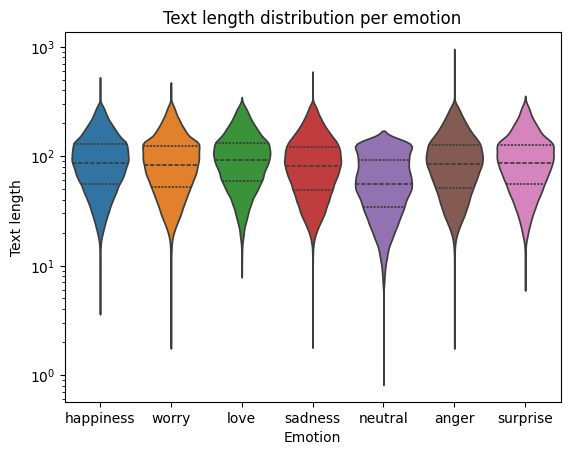

In [7]:
sns.violinplot(data=violin_plot_data, x='label', y='len', hue='label', inner='quartile', log_scale=True).set_title('Text length distribution per emotion')
plt.xlabel('Emotion')
plt.ylabel('Text length')
plt.show()